<a href="https://colab.research.google.com/github/bruno353/Machine-Learning/blob/main/Numbers_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [15]:
#baixando e usando um dataset do keras mesmo
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
len(X_train)

60000

In [17]:
len(X_test)

10000

In [18]:
#esse shape tá dizendo que a imagem é formada de 28 por 28 pixels.
X_train[0].shape

(28, 28)

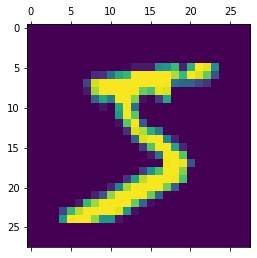

In [19]:
#plotando a primeira imagem de treino
plt.matshow(X_train[0])

In [23]:
#vamos padronizar, dar um scale para ficar entre 0 e 1 os pixels, então é so dividir por 255:
X_train = X_train/255
X_test = X_test/255

In [24]:
#transformar o x em um unidimensional array, o segundo parâmetro é a multiplicação dos shapes do X_train/test:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

##preparar o modelo


In [25]:
#no keras.Sequential nós definimos nossa rede neural.
#no keras.layers.Dense o primeiro parametro é o output, no caso 10, pois são 10 números
#no keras.layers.Dense o input_shape é a quantidade de pixels das imagens: 28*28, nesse caso 784.
#vamos usar a função sigmoid. 
model = keras.Sequential([
                  keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
              ])

#sempre tem que fazer um compile:
#o optmizer = adam deixa o modelo eficiente.
#no loss pode se usar o mean absolute error, mas nesse caso vamos utilizar esse já que o  outpute é categórico.
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#fitando o modelo:
#epochs é o número de iterations que tu quer q o modelo faça.
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4705 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9261


In [26]:
#vendo a acurácia em no dataset de test
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2684 - accuracy: 0.9256


[0.2683546841144562, 0.925599992275238]

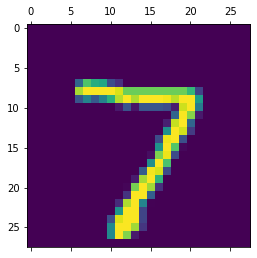

In [27]:
#agora vamos predizer o valor que está na posição 0 para ver como funciona>
plt.matshow(X_test[0])

In [29]:
#ele vai retornar um array com 10 números, que é a probabilidade de ser aquele número em que está a casa, a maior prob é a resposta.
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.0169288e-02, 4.1655753e-07, 5.7930529e-02, 9.6749139e-01,
       2.5246739e-03, 1.4006361e-01, 1.4469213e-06, 9.9985719e-01,
       1.0216075e-01, 6.7171788e-01], dtype=float32)

In [30]:
#e para ter a predição sem precisar ficar olhando qual prob é maior:
np.argmax(y_predicted[0])

7

##confusion_matrix

In [31]:
#agora que está com o modelo pronto, vamos fazer uma confusion_matrix para ver onde o modelo erra
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [32]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    0,    1,    0,   10,    8,    5,    3,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  920,   16,   12,    6,   13,   13,   38,    2],
       [   2,    0,   17,  911,    0,   38,    2,   13,   21,    6],
       [   1,    1,    2,    2,  923,    0,   12,    5,   11,   25],
       [   7,    2,    2,   20,   10,  800,   12,    6,   28,    5],
       [   7,    3,    5,    1,    8,   19,  909,    2,    4,    0],
       [   1,    6,   21,    6,    7,    0,    0,  964,    3,   20],
       [   5,    9,    5,   20,    9,   32,    9,   13,  866,    6],
       [   8,    7,    1,    9,   33,   10,    0,   38,    7,  896]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

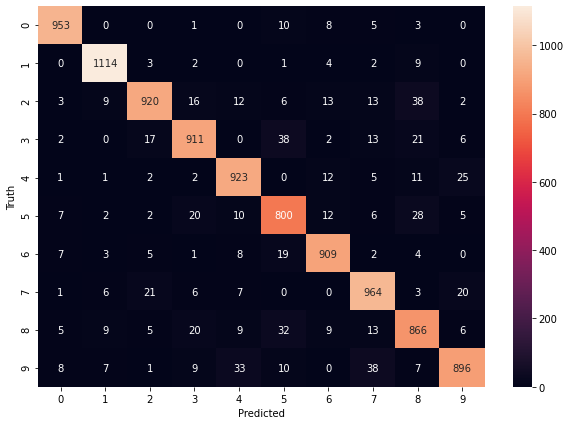

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##agora vamos adicionar uma hidenlayer 

In [34]:
#vamos fazer um modelo com hidenlayer
#na primeira layer, no primeiro parametro voce especifica quantos neuronios quer
#o primeiro parametro do ultimo layer é quantos outputs vai ter, nesse caso 10 números.
#o ultimo layer não precisa de input_shape
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2845 - accuracy: 0.9183
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1308 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0911 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0680 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0547 - accuracy: 0.9830


In [36]:
#acurácia(é o segundo número ali do array):
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9737


[0.08277759701013565, 0.9736999869346619]

##Sem precisar fazer um fattened

In [37]:
#voce coloca um keras.layers.Flatten
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),                    
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1418/1875 [=====================>........] - ETA: 0s - loss: 0.3016 - accuracy: 0.9137

KeyboardInterrupt: ignored